### Load the relevant libraries

In [1]:
import pandas as pd # for data import and dissection
import numpy as np # for data analysis
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### set the stage for data visualization

In [2]:
plt.interactive(False)
sns.set(style="whitegrid",color_codes=True)

#### Load the dataset and make a copy of it

In [3]:
# Reading the data where low_memory=False increases the program efficiency
data= pd.read_csv("data-taarifa.csv", low_memory=False)
sub1=data.copy()

#### List all the variables in the dataset

In [4]:
list(sub1.columns.values)

['id',
 'amount_tsh',
 'date_recorded',
 'funder',
 'gps_height',
 'installer',
 'longitude',
 'latitude',
 'wpt_name',
 'num_private',
 'basin',
 'subvillage',
 'region',
 'region_code',
 'district_code',
 'lga',
 'ward',
 'population',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'scheme_name',
 'permit',
 'construction_year',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group',
 'status_group']

### Data standardisation- Lowercase all the variable names 

In [5]:
#lowercase all variables
sub1.columns = [x.lower() for x in sub1.columns]

A quick peek at the dataset

In [6]:
sub1.head(5)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,14-03-11,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,06-03-13,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,25-02-13,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,28-01-13,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,13-07-11,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


## Problem challenge # 1
### Missing value treatment
#### A majority of the variables in this dataset are categorical. Therefore, I treat the missing values to the mode (replacement of missing values by most frequently occuring values)

In [7]:
## To fill every column with its own most frequent value you can use
sub1 = sub1.apply(lambda x:x.fillna(x.value_counts().index[0]))

## Problem challenge # 2
### Using one hot encoding to convert categorical variables of interest to dummy continuous numbers
#### For reference see this Kaggle post by Mark, https://www.kaggle.com/c/titanic/forums/t/5379/handling-categorical-data-with-sklearn 

In [8]:
from sklearn import preprocessing
le_enc = preprocessing.LabelEncoder()
#to convert into numbers
sub1.permit = le_enc.fit_transform(sub1.permit)
sub1.extraction_type_class=le_enc.fit_transform(sub1.extraction_type_class)
sub1.payment_type=le_enc.fit_transform(sub1.payment_type)
sub1.quality_group=le_enc.fit_transform(sub1.quality_group)
sub1.quantity_group=le_enc.fit_transform(sub1.quantity_group)
sub1.waterpoint_type_group=le_enc.fit_transform(sub1.waterpoint_type_group)
sub1.water_quality=le_enc.fit_transform(sub1.water_quality)
sub1.source_class=le_enc.fit_transform(sub1.source_class)
sub1.status_group=le_enc.fit_transform(sub1.status_group)

Another quick peek at the dataset. Notice, variables of interest like 'permit', 'extraction_type', 'payment_type', 'quality_group' have now been assigned dummy codes as required

In [9]:
sub1.head(5)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,14-03-11,Roman,1390,Roman,34.938093,-9.856322,none,0,...,6,2,enough,1,spring,spring,0,communal standpipe,1,0
1,8776,0.0,06-03-13,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,6,2,insufficient,2,rainwater harvesting,rainwater harvesting,1,communal standpipe,1,0
2,34310,25.0,25-02-13,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,6,2,enough,1,dam,dam,1,communal standpipe multiple,1,0
3,67743,0.0,28-01-13,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,6,2,dry,0,machine dbh,borehole,0,communal standpipe multiple,1,2
4,19728,0.0,13-07-11,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,6,2,seasonal,3,rainwater harvesting,rainwater harvesting,1,communal standpipe,1,0


###### explanatory variable is also known as the 'Independent variable' and response variable is also known as the 'dependent variable'

###### Variables of interest for this study are;
status_group,extraction_type_class,payment_type,quality_group,quantity_group,waterpoint_type_group,source_class,permit,water_quality

### Correlational Analysis for variables of interest
From a previous post(), I want to determine if there is any relationship between water quality, water quantity and water resource characterstics. So I use the regression methods as shown below to determine this.

In [10]:
print ("OLS regresssion model for the association between water pump condition status and quality of water in it")
reg1=smf.ols('status_group~permit',data=sub1).fit()
print (reg1.summary())

OLS regresssion model for the association between water pump condition status and quality of water in it
                            OLS Regression Results                            
Dep. Variable:           status_group   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     66.57
Date:                Sun, 19 Jun 2016   Prob (F-statistic):           3.44e-16
Time:                        12:43:01   Log-Likelihood:                -81191.
No. Observations:               59400   AIC:                         1.624e+05
Df Residuals:                   59398   BIC:                         1.624e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------

Status group is the response or dependent variable and permit is the independent variable.

The number of observations show the no. of observations that had valid data and thus were included in the analysis. 
The F-statistic is 66.57 and the p value is very small (Prob (F-statistic))= 3.44e-16 considerably less than our alpha level
of 0.05 which tell us that we can reject the null hypothesis and conclude that permit is significantly associated with water pump status group. 

The linear regression equation Y = b0 + b1X where X is the explanatory variable or the independent variable and Y is the response or the dependent variable.--(EQN 1)

Note: EQN 1 is significant because it can also help us in prediction of Y. Next, we look at the parameter estimates or the coeffecients or beta weights . 
Thus the coeffecient for permit is -0.0697 and the intercept is 0.8903.

Than the best fit line for permit is; status_group=0.89+0.06*permit -- (EQN 2)

In the above example, lets say we are told that a country has 80% people with valid water permits than can we predict the status of the water pump device? 

Yes, we plug the value of 80 in EQN 2 as given b0 = 0.89, b1 = 0.06 permit= 80

Than, y(hat) = 0.89+0.06*80 y(hat)= 5.69 or we can say that for 80% people with valid permits there will be approximately 6% water pumps that are functional 

Also note the P>|t| value is very small for permit. It is 0.0 and that the R-squared value is 0.001.

We now know that this model accounts for 0.001% variability that we see in our response variable permit.

In [11]:
# Now, I continue to add the variables to this model to check for any loss of significance
print ("OLS regresssion model for the association between status_group and other variables of interest")
reg1=smf.ols('status_group~quantity_group+extraction_type_class+waterpoint_type_group',data=sub1).fit()
print (reg1.summary())

OLS regresssion model for the association between status_group and other variables of interest
                            OLS Regression Results                            
Dep. Variable:           status_group   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     1674.
Date:                Sun, 19 Jun 2016   Prob (F-statistic):               0.00
Time:                        12:43:12   Log-Likelihood:                -78815.
No. Observations:               59400   AIC:                         1.576e+05
Df Residuals:                   59396   BIC:                         1.577e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------

In [12]:
print ("OLS regresssion model for the association between water pump status group and all variables of interest")
reg1=smf.ols('status_group~extraction_type_class+payment_type+quality_group+quantity_group+waterpoint_type_group+source_class+permit+water_quality',data=sub1).fit()
print (reg1.summary())

OLS regresssion model for the association between water pump status group and all variables of interest
                            OLS Regression Results                            
Dep. Variable:           status_group   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     772.1
Date:                Sun, 19 Jun 2016   Prob (F-statistic):               0.00
Time:                        12:43:18   Log-Likelihood:                -78286.
No. Observations:               59400   AIC:                         1.566e+05
Df Residuals:                   59391   BIC:                         1.567e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------

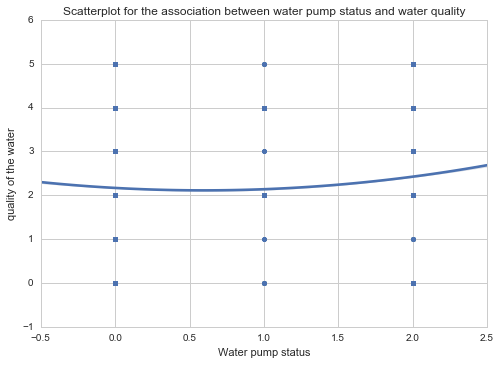

In [13]:
scat1 = sns.regplot(x="status_group", y="quality_group", order=2, scatter=True, data=sub1)
plt.xlabel('Water pump status')
plt.ylabel ('quality of the water')
plt.title ('Scatterplot for the association between water pump status and water quality')
#print scat1
plt.show()